<a href="https://colab.research.google.com/github/isuridevindi/e17-co328-Oral-Cavity-Region-Detection/blob/main/Unet_retry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import os
import random
import numpy as np
import time
from tqdm import tqdm 

from skimage.io import imread, imshow
from skimage.transform import resize
import matplotlib.pyplot as plt

# seed = 42
# np.random.seed = seed

IMG_WIDTH = 512
IMG_HEIGHT = 512
IMG_CHANNELS = 3

TRAIN_PATH = '/content/drive/MyDrive/6sp - Oral Cavity/Oral Cavity Region Detection Dataset/RGB teeth/'
TRAIN_MASK = '/content/drive/MyDrive/6sp - Oral Cavity/Oral Cavity Region Detection Dataset/teeth masks/'
#TEST_PATH = 'stage1_test/'

train_ids = next(os.walk(TRAIN_PATH))[2]
mask_ids = next(os.walk(TRAIN_MASK))[2]
print(train_ids)
print(mask_ids)
#test_ids = next(os.walk(TEST_PATH))[1]

X_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
Y_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH,1), dtype=np.uint8)

print('Resizing training images and masks')
for n, id_ in tqdm(enumerate(train_ids), total=len(train_ids)):   
    path = TRAIN_PATH + id_
  #  print(id_)
    img = imread(path)[:,:,:IMG_CHANNELS]  
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    # imshow(img)
    
    # # 
    # # imshow(img)
    X_train[n] = img  #Fill empty X_train with values from img
    mask = np.zeros((IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.uint8)
    for mask_file in mask_ids:
      if mask_file.split("_")[0] == id_.split("_")[0]:
      #  print("mask file ", mask_file, "original ", id_)
        ypath = TRAIN_MASK + mask_file
        y = imread(ypath)
       # y = resize(y, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)

        y = np.expand_dims(resize(y, (IMG_HEIGHT, IMG_WIDTH), mode='constant',  
                                      preserve_range=True), axis=-1)
        Y_train[n] = y
    #     mask_ = imread(path + '/masks/' + mask_file)
    #     mask_ = np.expand_dims(resize(mask_, (IMG_HEIGHT, IMG_WIDTH), mode='constant',  
    #                                   preserve_range=True), axis=-1)
    #     mask = np.maximum(mask, mask_)  
            
    # Y_train[n] = mask   

# # test images
# X_test = np.zeros((len(test_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
# sizes_test = []
# print('Resizing test images') 
# for n, id_ in tqdm(enumerate(test_ids), total=len(test_ids)):
#     path = TEST_PATH + id_
#     img = imread(path + '/images/' + id_ + '.png')[:,:,:IMG_CHANNELS]
#     sizes_test.append([img.shape[0], img.shape[1]])
#     img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
#     X_test[n] = img

# print('Done!')


['5f1670b8_front_1.png', '321ec3dc_front_2.png', '5ebfeae0_front_3.png', 'a24e6f89_tongue_1.png', 'c1261b69_tongue_2.png', 'f8117304_top_1.png', '60a01651_front_1.png', '268a97d0_front_2.png', '6375f0ac_top_1.png', 'abf46a0f_top_2.png', '2b18392e_front_1.png', '71d4ac12_front_2.png', 'c4a8772d_front_1.png', 'f8ef04c9_front_2.png', '9db146f4_front_1.png', '5565f021_front_1.png', '2773ccf1_front_2.png', '34f0b3ec_front_1.png', '34dec32c_front_1.png', 'b1de48fc_front_1.png', '42bef1c9_front_1.png', '93f11393_front_2.png', 'f0506ceb_front_3.png', '7e1fc1d2_front_4.png', '488b1f68_bottom_2.png', '50198446_bottom_inpainted_GDBICP_similarity.png', 'a03af337_top_3.png', '68f32a0e_wide_6.png', '2ea1fec2_bottom_1.png', 'b10644da_front_2.png', '6bb49860_top_2.png', 'da8e1a2f_bottom_inpainted_GDBICP_similarity.png', '9fea3e9b_lip_2.png', '5c59b624_bottom_1.png', '6098d87a_top_1.png', 'a0b67057_cheek_1.png', 'aa469c9b_front_3.png', '9f1ed64e_bottom_inpainted_GDBICP_similarity.png', '2b29da80_bottom

100%|██████████| 154/154 [01:07<00:00,  2.27it/s]


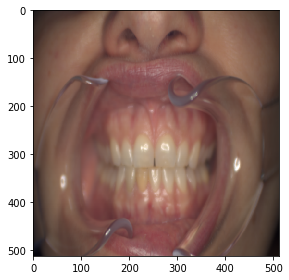

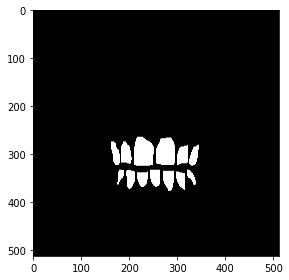

In [ ]:
image_x = random.randint(0, len(train_ids))
imshow(X_train[image_x])
plt.show()
# imshow(Y_train[image_x])
imshow(np.squeeze(Y_train[image_x]))
# print(Y_train[image_x])
plt.show()

In [ ]:
# #Build the model
# inputs = tf.keras.layers.Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
# s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)

# #Contraction path
# c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
# c1 = tf.keras.layers.Dropout(0.1)(c1)
# c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
# p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

# c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
# c2 = tf.keras.layers.Dropout(0.1)(c2)
# c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
# p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)
 
# c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
# c3 = tf.keras.layers.Dropout(0.2)(c3)
# c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
# p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)
 
# c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
# c4 = tf.keras.layers.Dropout(0.2)(c4)
# c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
# p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)
 
# c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
# c5 = tf.keras.layers.Dropout(0.3)(c5)
# c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

# #Expansive path 
# u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
# u6 = tf.keras.layers.concatenate([u6, c4])
# c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
# c6 = tf.keras.layers.Dropout(0.2)(c6)
# c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
 
# u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
# u7 = tf.keras.layers.concatenate([u7, c3])
# c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
# c7 = tf.keras.layers.Dropout(0.2)(c7)
# c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
 
# u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
# u8 = tf.keras.layers.concatenate([u8, c2])
# c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
# c8 = tf.keras.layers.Dropout(0.1)(c8)
# c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
 
# u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
# u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
# c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
# c9 = tf.keras.layers.Dropout(0.1)(c9)
# c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)
 
# outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)
 
# model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# model.summary()


In [ ]:
# ################################
# #Modelcheckpoint
# checkpointer = tf.keras.callbacks.ModelCheckpoint('model_for_nuclei.h5', verbose=1, save_best_only=True)

# callbacks = [
#         tf.keras.callbacks.EarlyStopping(patience=2, monitor='val_loss'),
#         tf.keras.callbacks.TensorBoard(log_dir='logs')]

# results = model.fit(X_train, Y_train,batch_size=5, epochs=2)#, callbacks=callbacks)

# ####################################

# idx = random.randint(0, len(X_train))


# preds_train = model.predict(X_train[:int(X_train.shape[0]*0.9)], verbose=1)
# preds_val = model.predict(X_train[int(X_train.shape[0]*0.9):], verbose=1)
# preds_test = model.predict(X_train, verbose=1)

 
# preds_train_t = (preds_train > 0.5).astype(np.uint8)
# preds_val_t = (preds_val > 0.5).astype(np.uint8)
# preds_test_t = (preds_test > 0.5).astype(np.uint8)


# # Perform a sanity check on some random training samples
# ix = random.randint(0, len(preds_train_t))
# imshow(X_train[ix])
# plt.show()
# imshow(np.squeeze(Y_train[ix]))
# plt.show()
# imshow(np.squeeze(preds_train_t[ix]))
# plt.show()

# # Perform a sanity check on some random validation samples
# ix = random.randint(0, len(preds_val_t))
# imshow(X_train[int(X_train.shape[0]*0.9):][ix])
# plt.show()
# imshow(np.squeeze(Y_train[int(Y_train.shape[0]*0.9):][ix]))
# plt.show()
# imshow(np.squeeze(preds_val_t[ix]))
# plt.show()


72


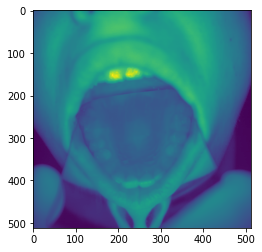

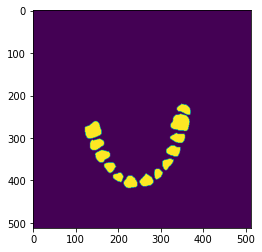

In [ ]:
X=np.float32(X_train/255)
Y=np.float32(Y_train/255)

x_train=X[:105,:,:,:]
y_train=Y[:105,:,:,:]
x_test=X[105:,:,:,:]
y_test=Y[105:,:,:,:]

import random
import matplotlib.pyplot as plt
random_number=random.randint(0,104)
print(random_number)

#Checking data X  and Y matching
plt.imshow(x_train[random_number,:,:,0])
plt.show()
#Checking data X  and Y matching
plt.imshow(y_train[random_number,:,:,0])

In [ ]:

def UNET (input_shape=(512,512,3),last_activation='sigmoid'):
    inputs=tf.keras.layers.Input(shape=input_shape)
    
    conv1 = tf.keras.layers.Conv2D(32,(3,3), activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
    d1=tf.keras.layers.Dropout(0.1)(conv1)
    conv2 = tf.keras.layers.Conv2D(32,(3,3), activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(d1)
    b=tf.keras.layers.BatchNormalization()(conv2)
    
    pool1 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(b)
    conv3 = tf.keras.layers.Conv2D(64,(3,3), activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    d2=tf.keras.layers.Dropout(0.2)(conv3)
    conv4 = tf.keras.layers.Conv2D(64,(3,3), activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(d2)
    b1=tf.keras.layers.BatchNormalization()(conv4)
    
    pool2 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(b1)
    conv5 = tf.keras.layers.Conv2D(128,(3,3), activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    d3=tf.keras.layers.Dropout(0.3)(conv5)
    conv6 = tf.keras.layers.Conv2D(128,(3,3), activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(d3)
    b2=tf.keras.layers.BatchNormalization()(conv6)
    
    pool3 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(b2)
    conv7 = tf.keras.layers.Conv2D(256,(3,3), activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    d4=tf.keras.layers.Dropout(0.4)(conv7)
    conv8 = tf.keras.layers.Conv2D(256,(3,3), activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(d4)
    b3=tf.keras.layers.BatchNormalization()(conv8)
    
    pool4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(b3)
    conv9 = tf.keras.layers.Conv2D(512,(3,3),activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
    d5=tf.keras.layers.Dropout(0.5)(conv9)
    conv10 = tf.keras.layers.Conv2D(512,(3,3), activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(d5)
    b4=tf.keras.layers.BatchNormalization()(conv10)
    
    
    conv11 = tf.keras.layers.Conv2DTranspose(512,(4,4), activation = 'relu', padding = 'same', strides=(2,2),kernel_initializer = 'he_normal')(b4)
    x= tf.keras.layers.concatenate([conv11,conv8])
    conv12 = tf.keras.layers.Conv2D(256,(3,3), activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(x)
    d6=tf.keras.layers.Dropout(0.4)(conv12)
    conv13 = tf.keras.layers.Conv2D(256,(3,3), activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(d6)
    b5=tf.keras.layers.BatchNormalization()(conv13)
    
    
    conv14 = tf.keras.layers.Conv2DTranspose(256,(4,4), activation = 'relu', padding = 'same', strides=(2,2),kernel_initializer = 'he_normal')(b5)
    x1=tf.keras.layers.concatenate([conv14,conv6])
    conv15 = tf.keras.layers.Conv2D(128,3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(x1)
    d7=tf.keras.layers.Dropout(0.3)(conv15)
    conv16 = tf.keras.layers.Conv2D(128,3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(d7)
    b6=tf.keras.layers.BatchNormalization()(conv16)
    
    conv17 = tf.keras.layers.Conv2DTranspose(128,(4,4), activation = 'relu', padding = 'same',strides=(2,2), kernel_initializer = 'he_normal')(b6)
    x2=tf.keras.layers.concatenate([conv17,conv4])
    conv18 = tf.keras.layers.Conv2D(64,(3,3), activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(x2)
    d8=tf.keras.layers.Dropout(0.2)(conv18)
    conv19 = tf.keras.layers.Conv2D(64,(3,3) ,activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(d8)
    b7=tf.keras.layers.BatchNormalization()(conv19)
    
    conv20 = tf.keras.layers.Conv2DTranspose(64,(4,4), activation = 'relu', padding = 'same',strides=(2,2), kernel_initializer = 'he_normal')(b7)
    x3=tf.keras.layers.concatenate([conv20,conv2])
    conv21 = tf.keras.layers.Conv2D(32,(3,3) ,activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(x3)
    d9=tf.keras.layers.Dropout(0.1)(conv21)
    conv22 = tf.keras.layers.Conv2D(32,(3,3), activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(d9)
    
    outputs = tf.keras.layers.Conv2D(1,(1,1), activation = last_activation, padding = 'same', kernel_initializer = 'he_normal')(conv22)
    model2 = tf.keras.Model( inputs = inputs, outputs = outputs)
    
    return model2


In [ ]:
model=UNET(input_shape=(512,512,3),last_activation='sigmoid')
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 512, 512, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 512, 512, 32  896         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 dropout (Dropout)              (None, 512, 512, 32  0           ['conv2d[0][0]']                 
                                )                                                             

In [ ]:
model.compile(optimizer ='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
#Your choice batch and epoch 
model.fit(x_train,y_train,batch_size=8,epochs=10,verbose=1)

Epoch 1/10
14/14 [==============================] - 41s 1s/step - loss: 0.2819 - accuracy: 0.8883
Epoch 2/10
14/14 [==============================] - 14s 998ms/step - loss: 0.1169 - accuracy: 0.9546
Epoch 3/10
14/14 [==============================] - 14s 1s/step - loss: 0.1067 - accuracy: 0.9546
Epoch 4/10
14/14 [==============================] - 15s 1s/step - loss: 0.0978 - accuracy: 0.9546
Epoch 5/10
14/14 [==============================] - 15s 1s/step - loss: 0.0907 - accuracy: 0.9546
Epoch 6/10
14/14 [==============================] - 15s 1s/step - loss: 0.0868 - accuracy: 0.9546
Epoch 7/10
14/14 [==============================] - 14s 1s/step - loss: 0.0830 - accuracy: 0.9546
Epoch 8/10
 1/14 [=>............................] - ETA: 14s - loss: 0.0643 - accuracy: 0.9617

KeyboardInterrupt: ignored

In [ ]:
predict_img=model.predict(x_test)
##model.save(path)

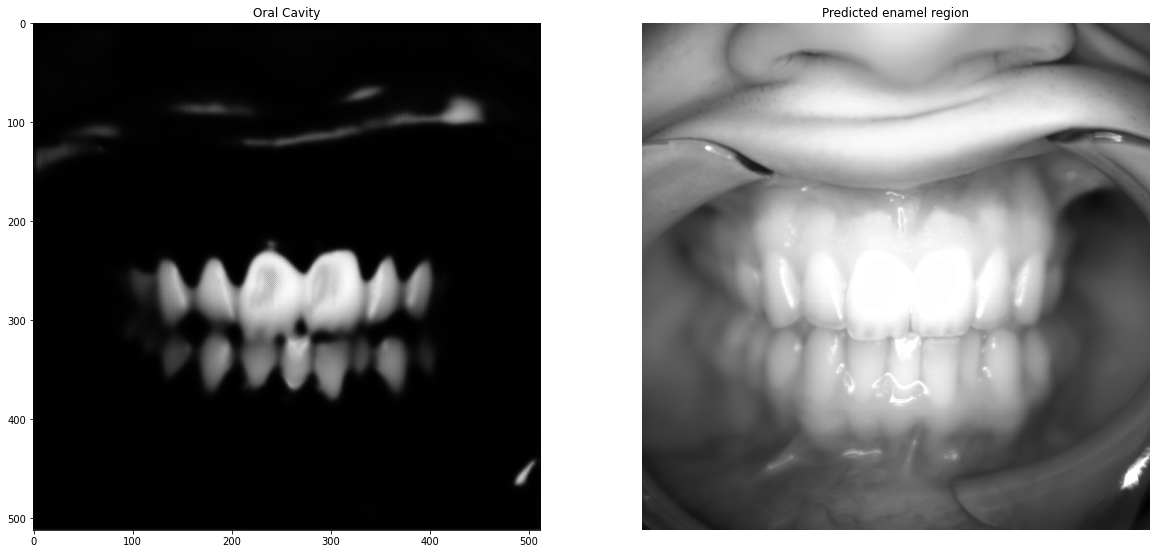

In [ ]:
image_num =20
predict=predict_img[image_num,:,:,0] 

plt.figure(figsize = (20,10))
# plt.title("Predicted Mask",fontsize = 40)
# plt.imshow(predict, cmap='gray')
# plt.imshow(x_test[image_num,:,:,0], cmap='gray' )
# plt.show()

plt.subplot(121),plt.imshow(predict, cmap='gray'),plt.title('Oral Cavity')
plt.subplot(122),plt.imshow(x_test[image_num,:,:,0], cmap='gray' ),plt.title('Predicted enamel region')
plt.axis('off')
plt.show()

In [ ]:
# plt.figure(figsize = (20,10))
# plt.title("Predicted Mask",fontsize = 40)
# plt.imshow(predict, cmap='gray')
# #For CCA, we saved
# #plt.imsave("/content/predict.png",predict)

In [ ]:
#Example Test
from sklearn.metrics import f1_score
import numpy as np
predict_img1=(predict_img>0.25)*1
y_test1=(y_test>0.25)*1

f1_score(predict_img1.flatten(), y_test1.flatten(), average='micro')

0.949289049421038

[<keras.engine.input_layer.InputLayer object at 0x7f0ed50e2250>, <keras.layers.convolutional.Conv2D object at 0x7f0ed51f7ad0>, <keras.layers.core.dropout.Dropout object at 0x7f0ed50e2710>, <keras.layers.convolutional.Conv2D object at 0x7f0ed50e2e90>, <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f0ec001b510>, <keras.layers.pooling.MaxPooling2D object at 0x7f0ec001b890>, <keras.layers.convolutional.Conv2D object at 0x7f0ec001d350>, <keras.layers.core.dropout.Dropout object at 0x7f0ec00200d0>, <keras.layers.convolutional.Conv2D object at 0x7f0e567a9690>, <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f0e567b3210>, <keras.layers.pooling.MaxPooling2D object at 0x7f0e567bc290>, <keras.layers.convolutional.Conv2D object at 0x7f0e567b7810>, <keras.layers.core.dropout.Dropout object at 0x7f0e567c32d0>, <keras.layers.convolutional.Conv2D object at 0x7f0e567c9ad0>, <keras.layers.normalization.batch_normalization.BatchNormalizatio

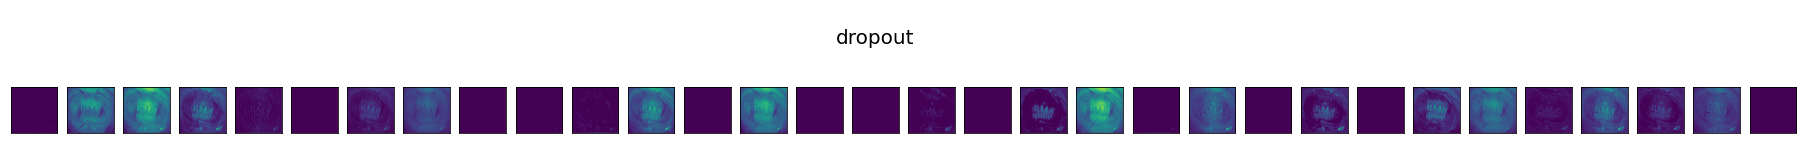

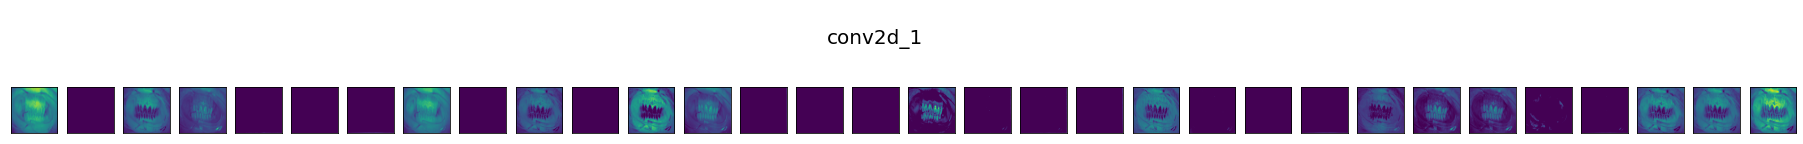

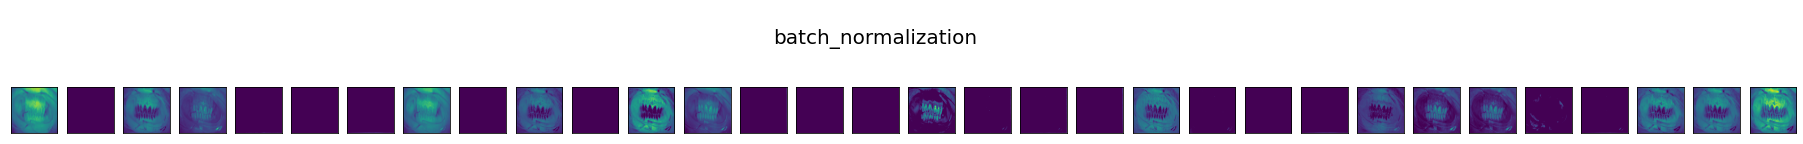

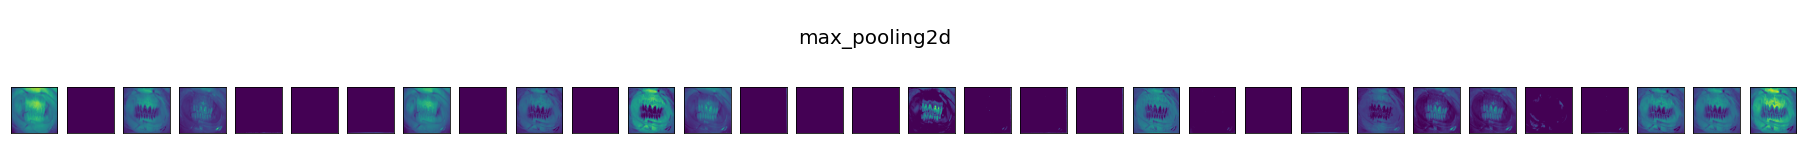

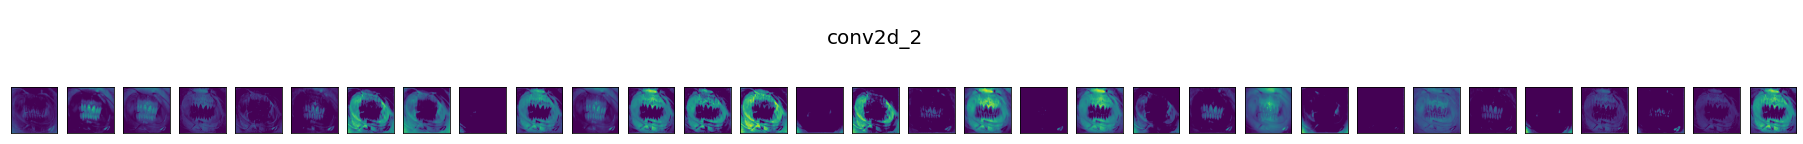

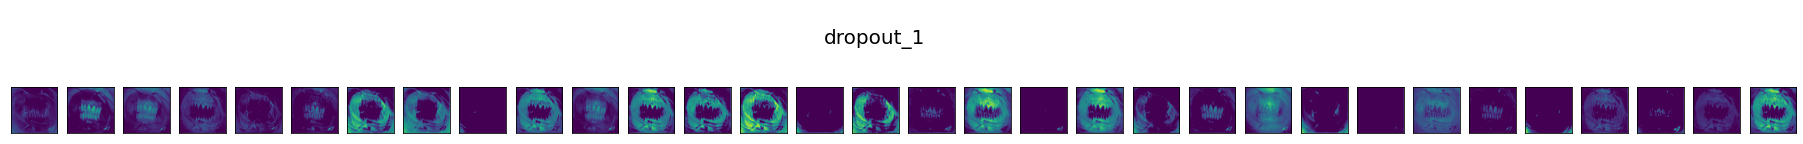

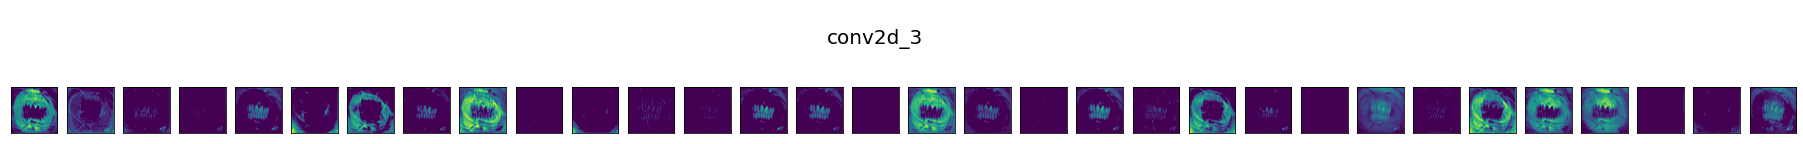

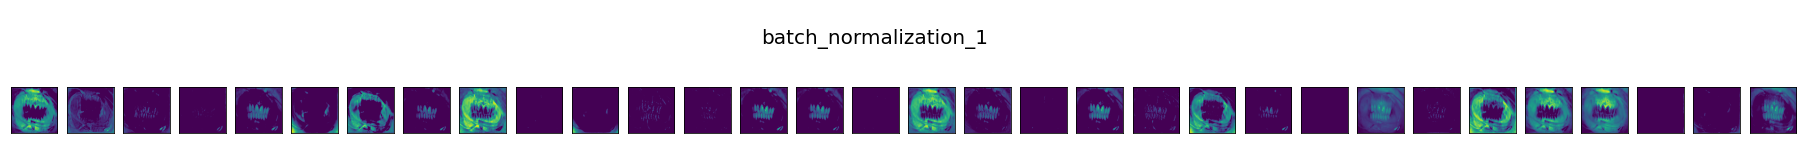

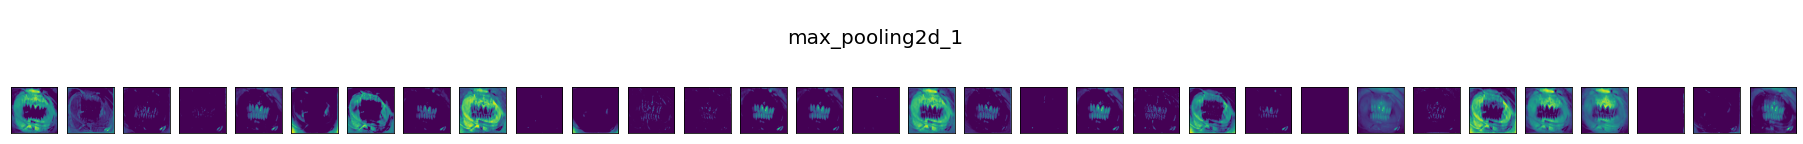

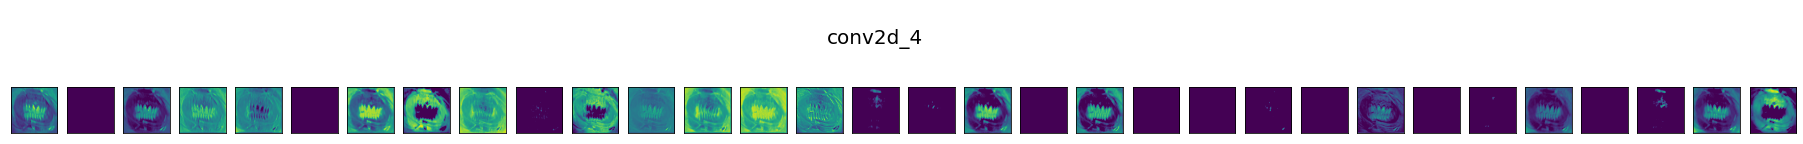

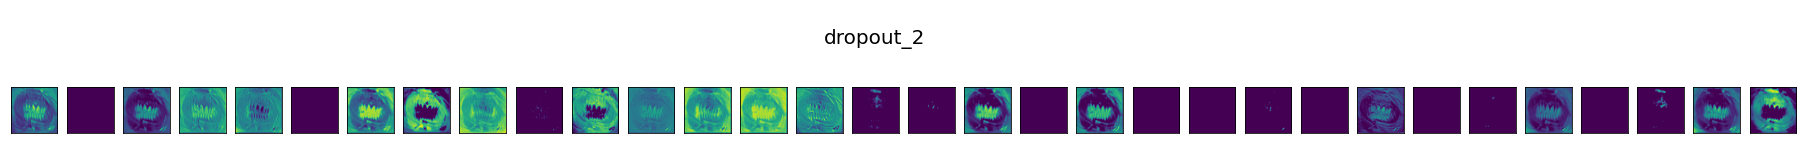

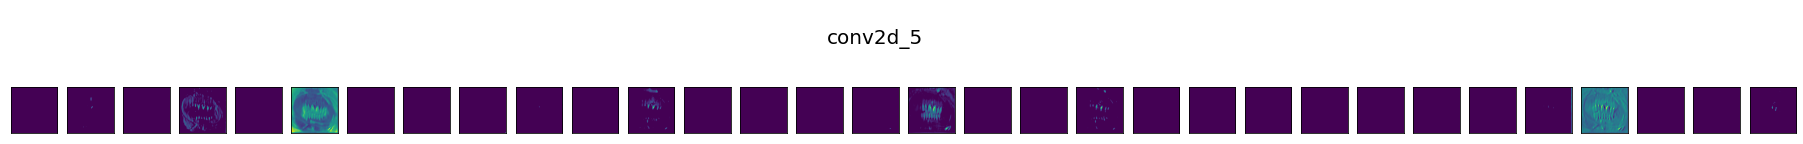

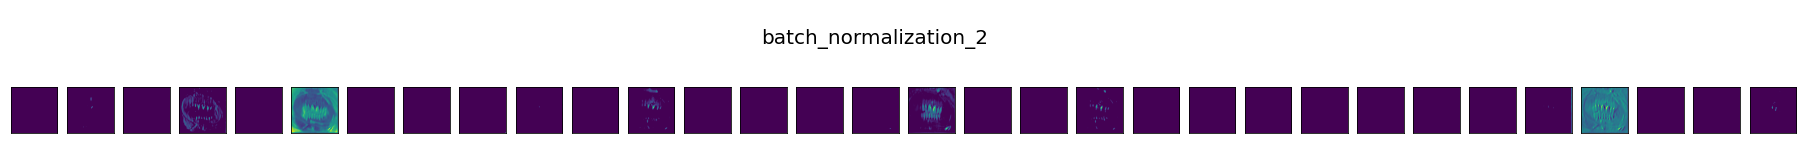

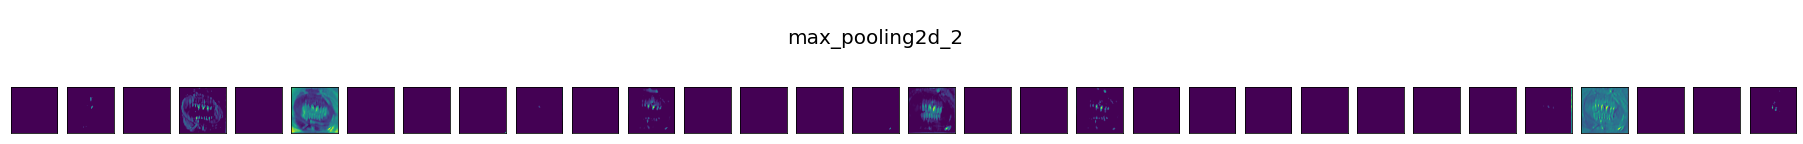

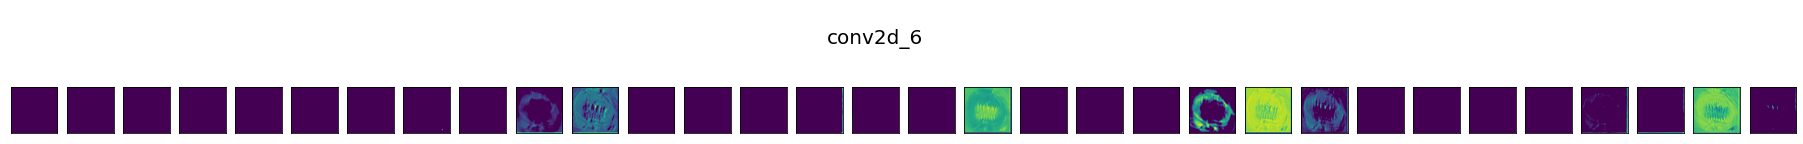

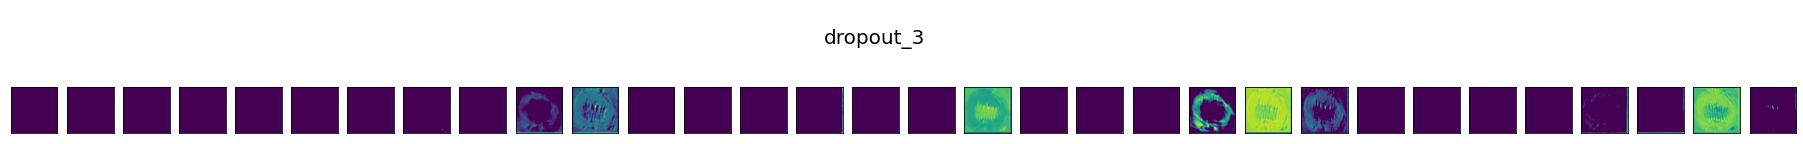

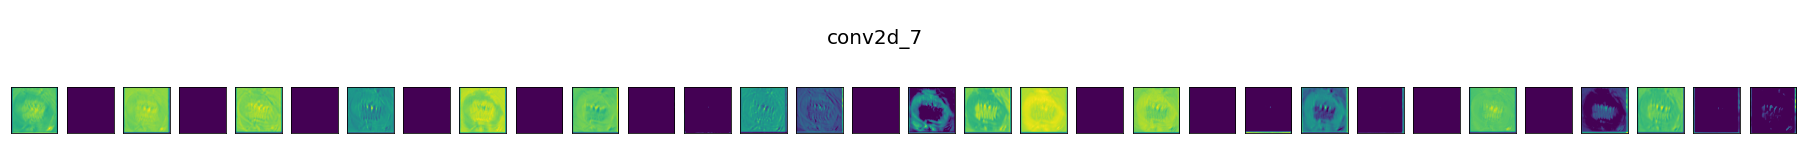

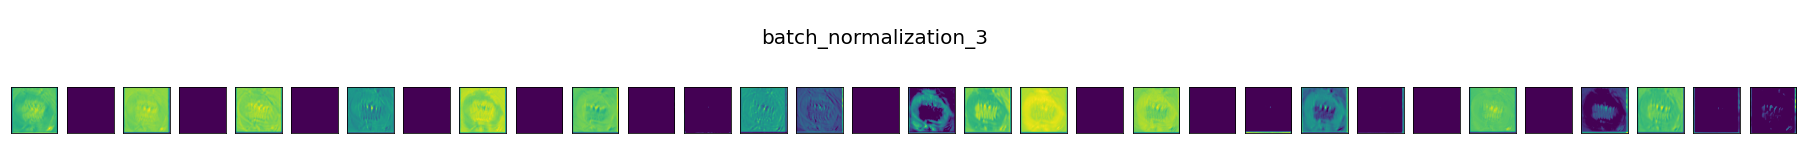

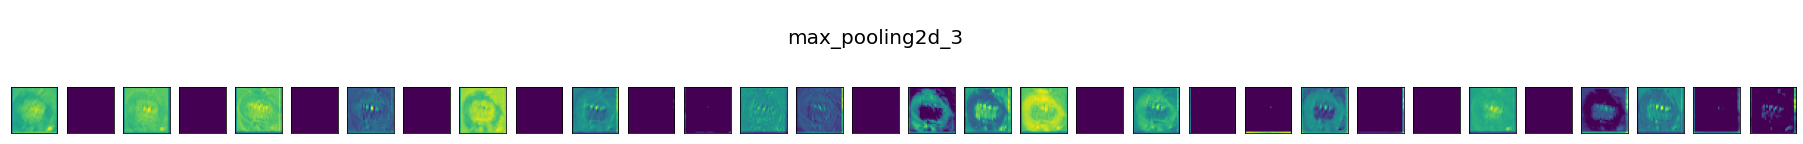

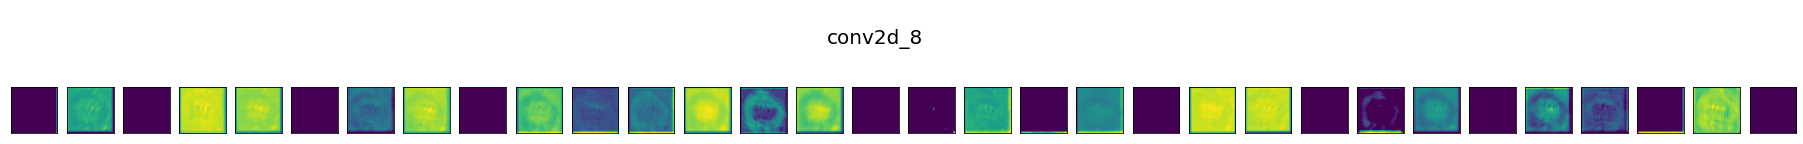

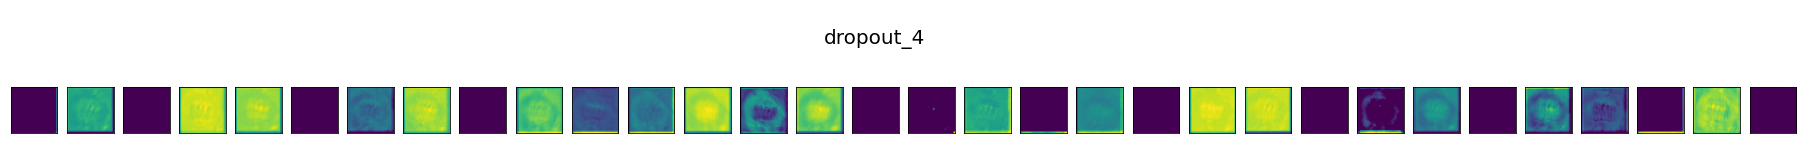

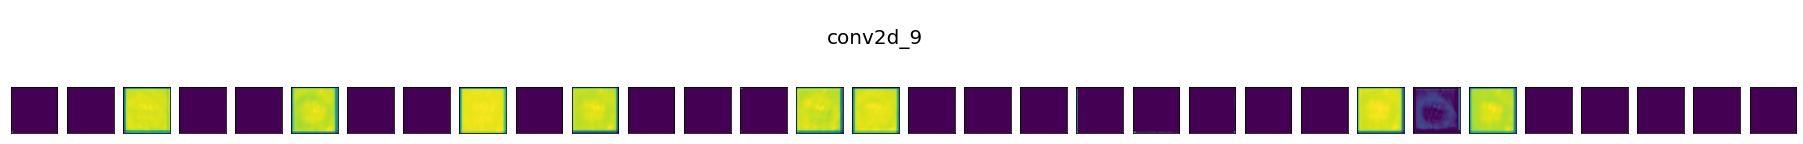

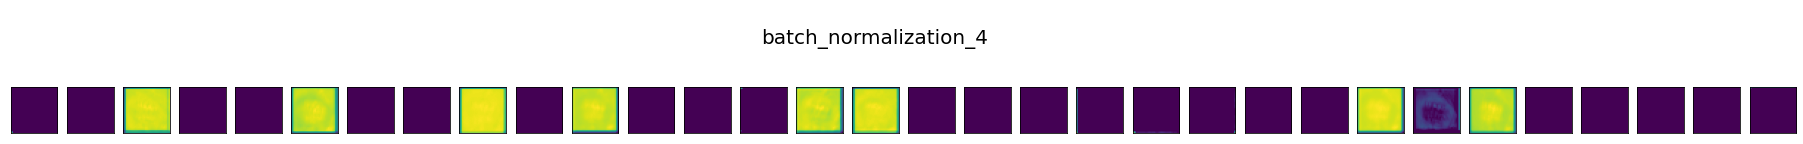

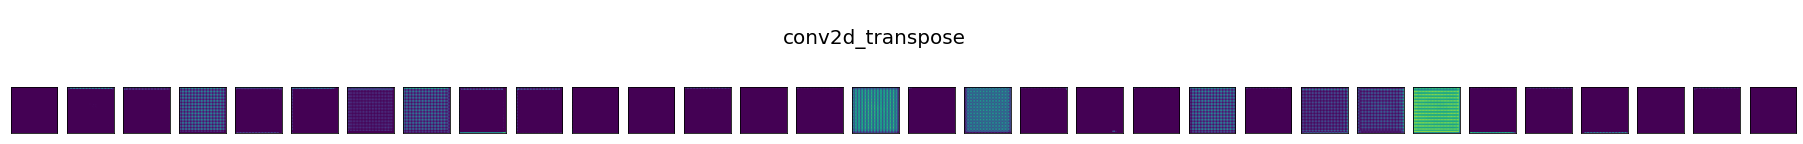

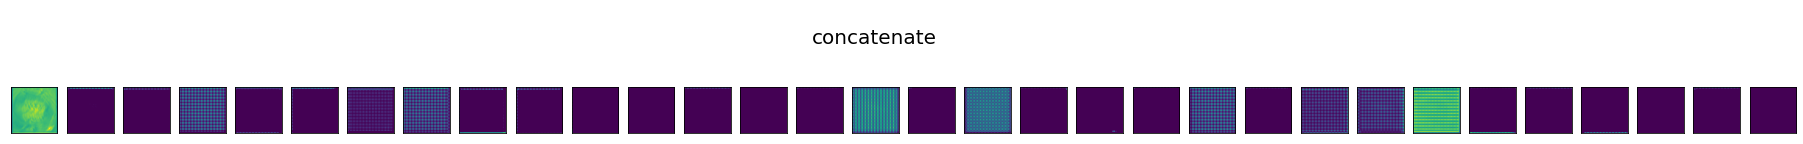

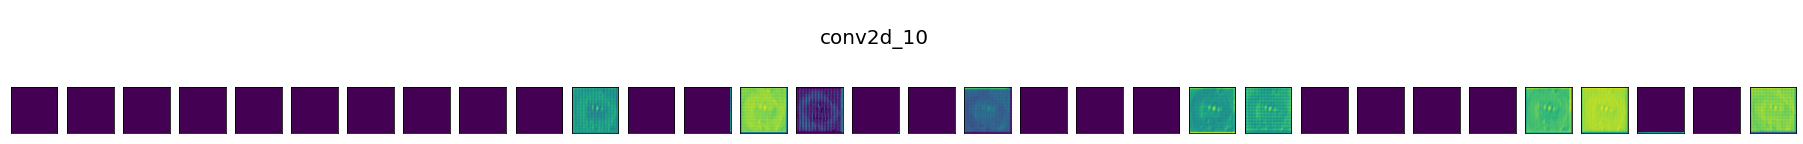

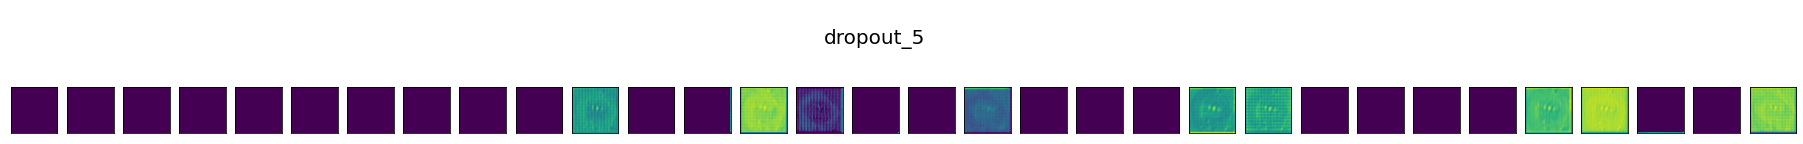

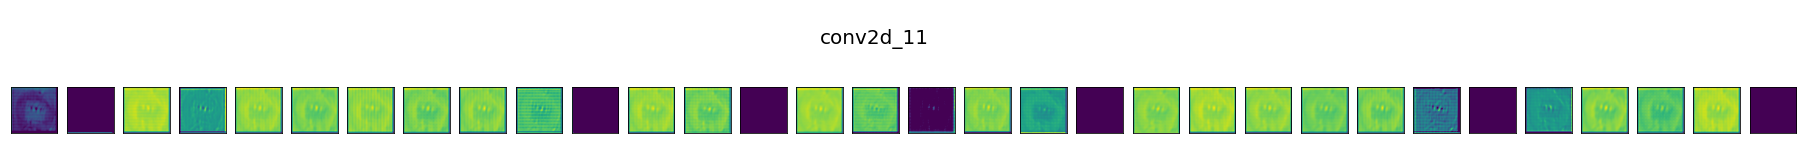

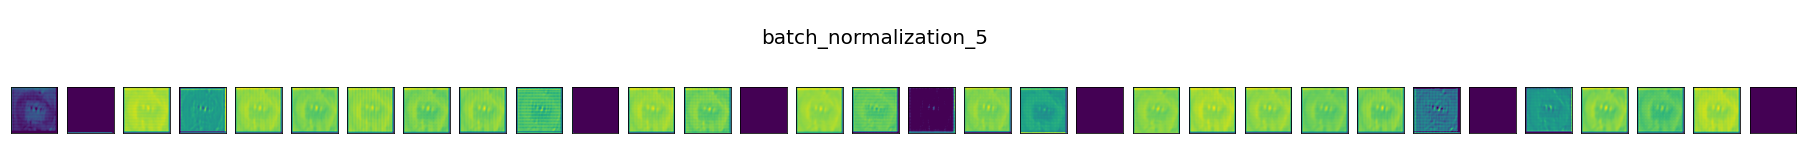

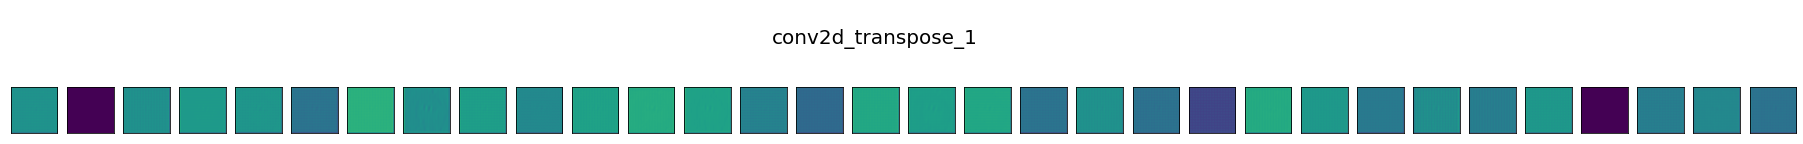

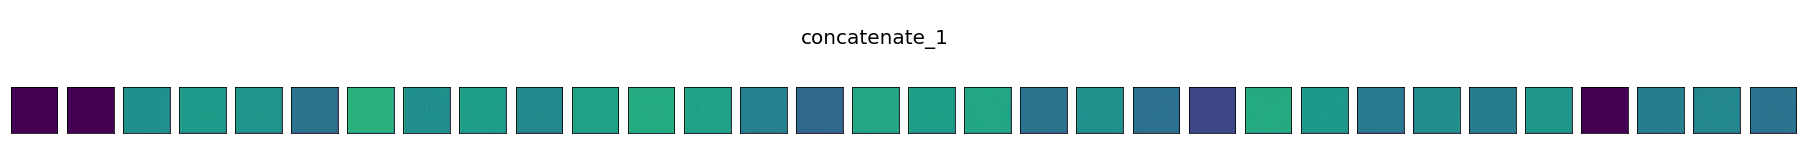

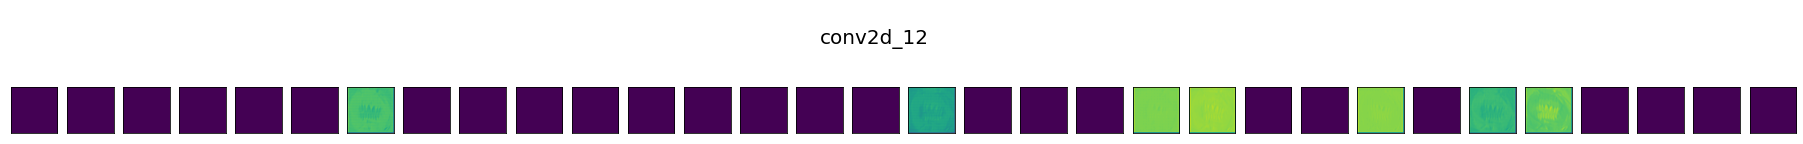

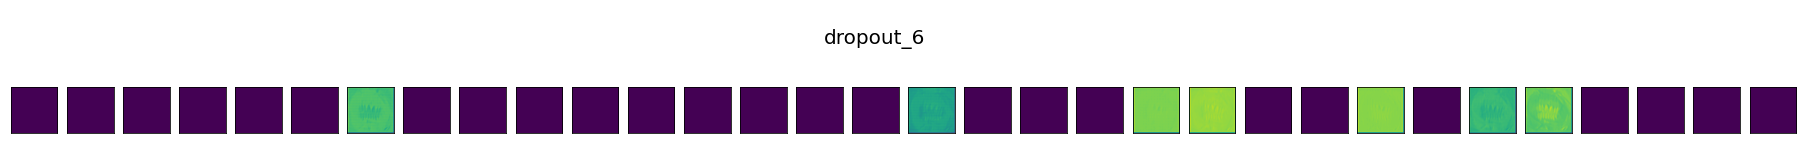

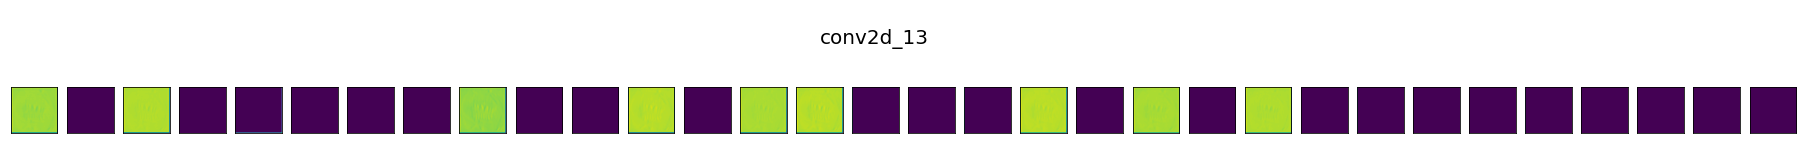

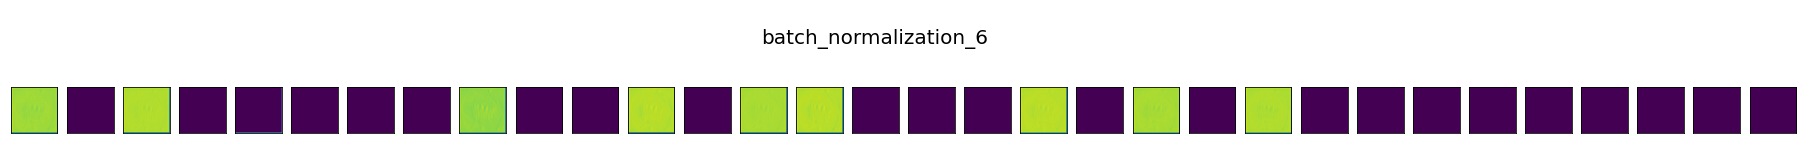

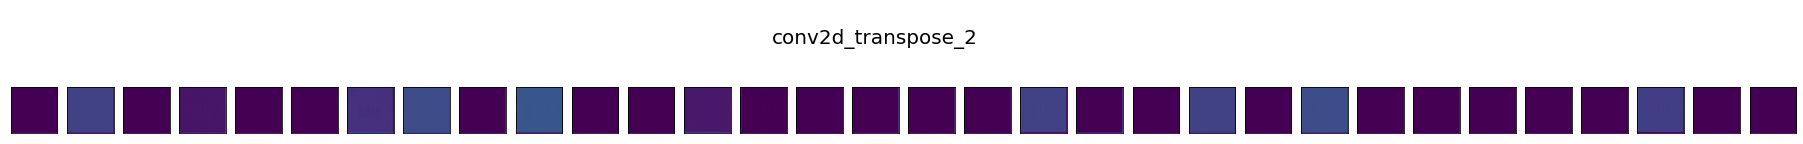

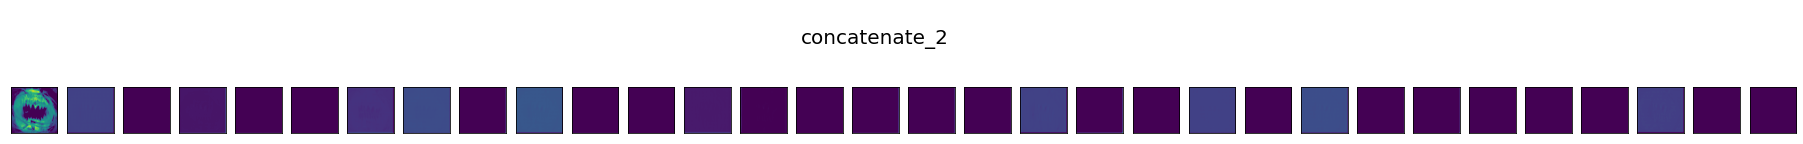

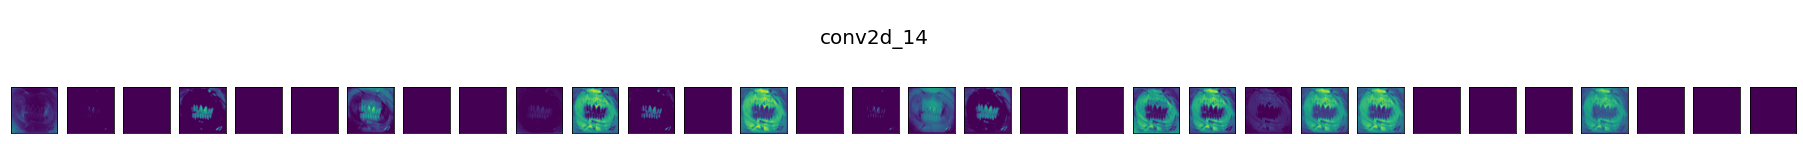

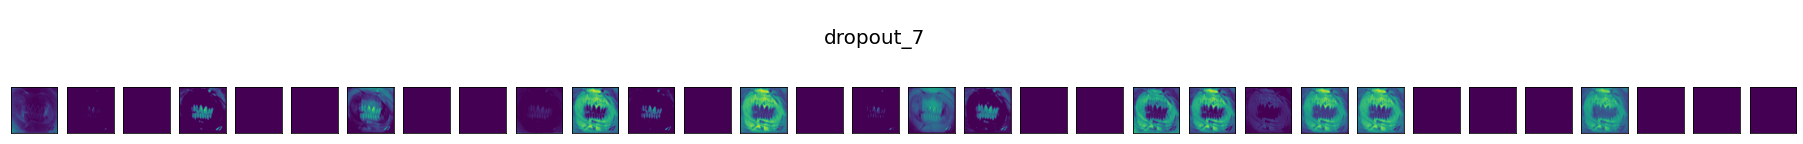

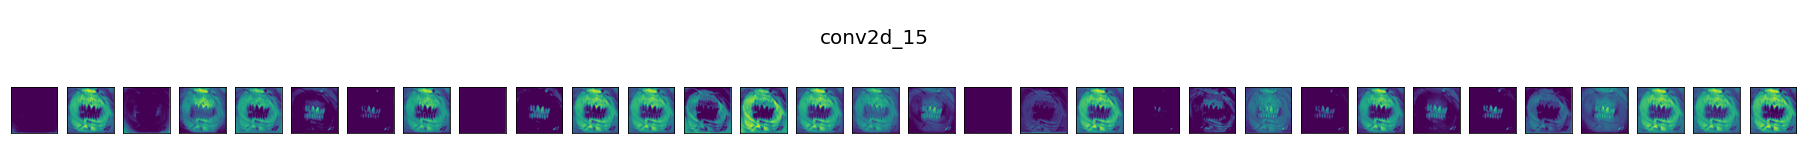

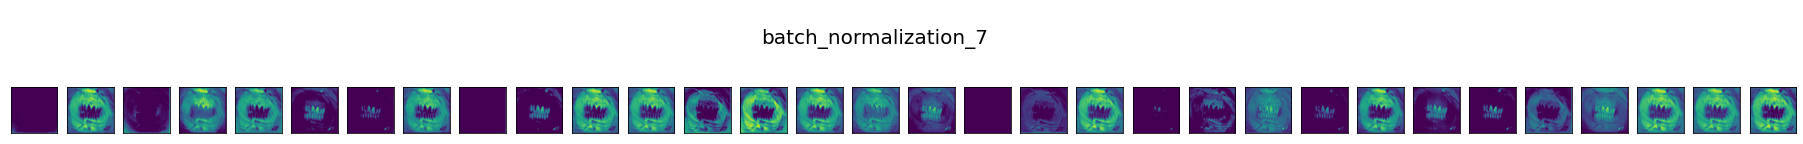

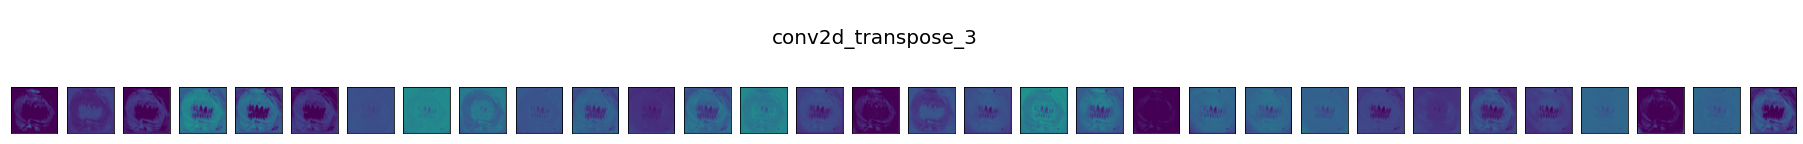

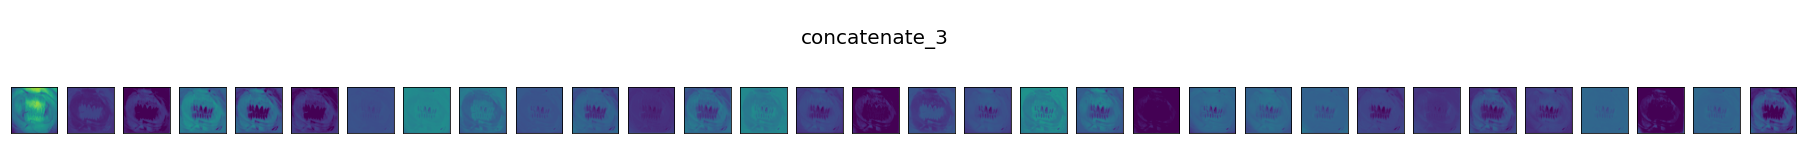

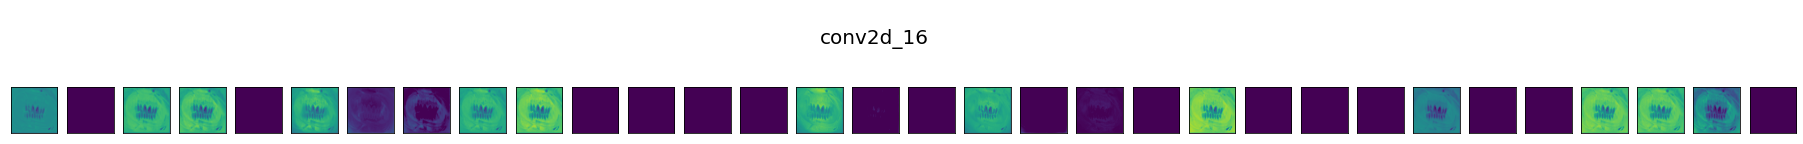

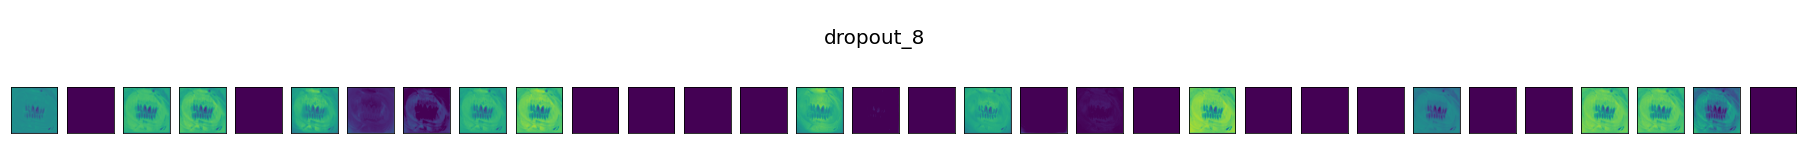

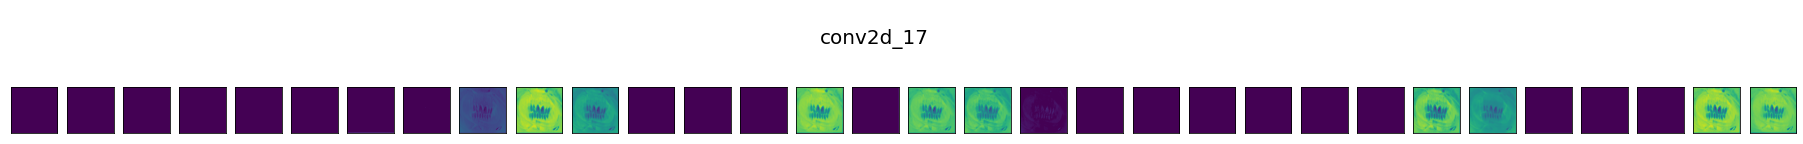

In [ ]:
# Store the names of the layers that must observed seperately
layer_names =[]
print(model.layers)
for layer in model.layers[1:]:
    layer_names.append(layer.name) # Names of the layers
 
# # Get the list of layers for the existing model
layer_dict = {layer.name : layer for layer in model.layers}
print(layer_names[1:3])
# # # Choose an image from the training set
image = x_train[20] 

# # # Add the extra dimension expected by the slice
image = np.expand_dims(image, axis=0)
for layer_num in range (1,len(layer_names)-1):
#   # Create a copy of the existing model containing just the specific layer Layer
    modelslice = tf.keras.Model(inputs=model.inputs, outputs=layer_dict[layer_names[layer_num]].output)

#   # Send the image through the model with the specific layer
    feature_maps = modelslice.predict(image)
 
    fig = plt.figure(figsize=(32, 3))
    fig.suptitle('\n'+layer_names[layer_num], fontsize=20)
  
    # Display the 32 feature maps from each layer
    for i in range(32):
        plt.subplot(1,32,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(feature_maps[0, :, :, i-1])
    
    plt.show()